# Vehicle Detection
The goal of this project is to build a pipeline that detects vehicles in a video (to simulate detecting vehicles while on the road).

The pipeline includes:

The pipeline is demonstrated on six test images.

In [1]:
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

test_image_file_names = glob.glob('./test_images/test*.jpg')
num_images = len(test_image_file_names)

## Extract HOG features of each image
The histogram of gradients is extracted from each image.  The image is first grayscaled then run through scikit-image's [hog](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog) function.

In [2]:
from skimage import color
from skimage.feature import hog

def extract_hog_features(image, num_orients, pixels_per_cell, cells_per_block, return_hog_img=True, return_feature_vec=True):
    grayscale_img = color.rgb2gray(image)
    return hog(grayscale_img, orientations=num_orients, pixels_per_cell=(pixels_per_cell, pixels_per_cell), cells_per_block=(cells_per_block, cells_per_block), visualise=return_hog_img, transform_sqrt=True)

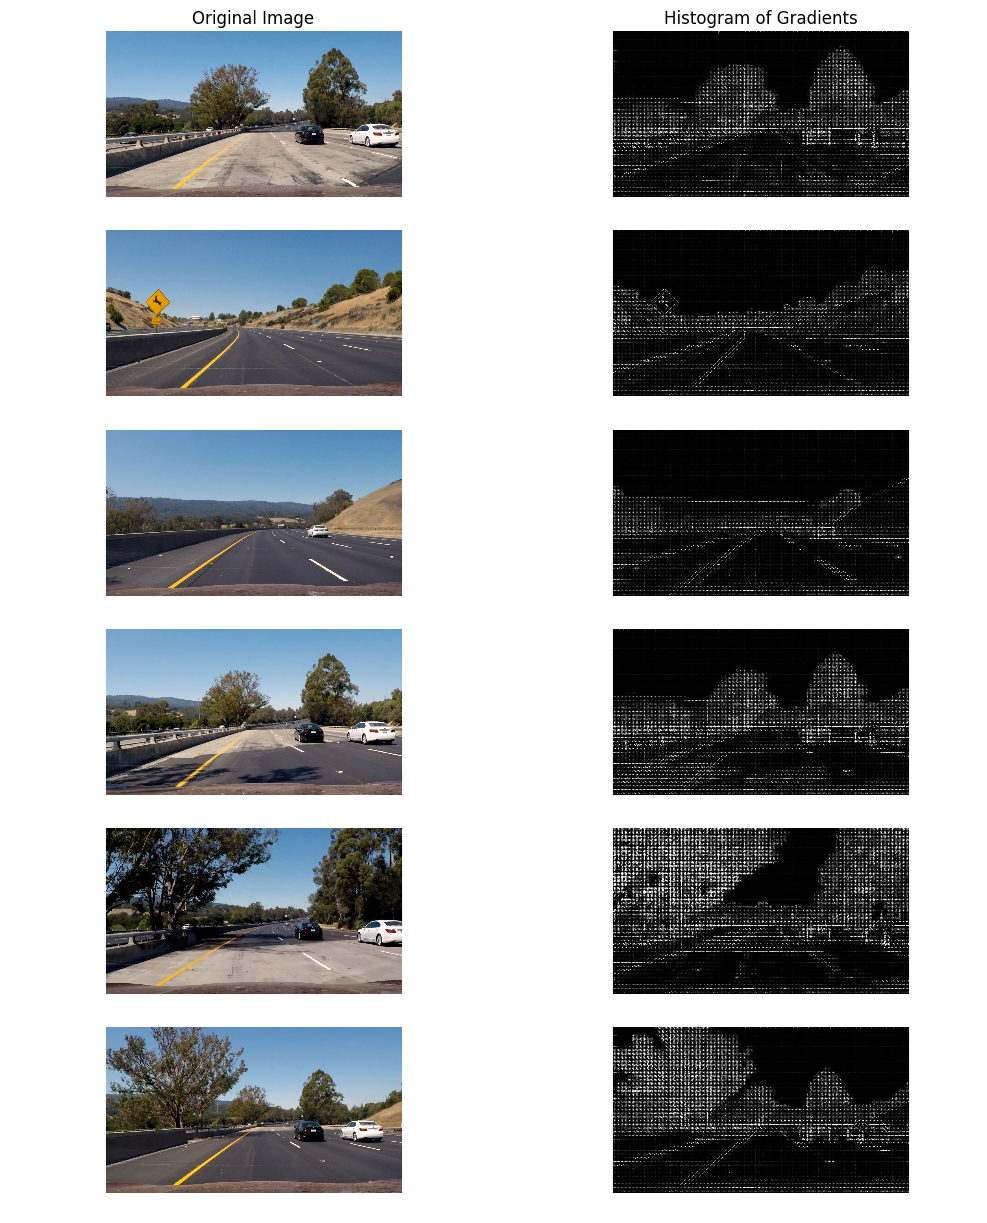

In [3]:
from skimage import exposure

num_orientations = 18
pixels_per_cell = 16
cells_per_block = 1

fig, axarr = plt.subplots(num_images, 2, figsize=(12, 15), sharey=True)
axarr[0, 0].set_title('Original Image')
axarr[0, 1].set_title('Histogram of Gradients')

hogs = []
hog_images = []
for idx, test_image_file_name in enumerate(test_image_file_names):
    image = mpimg.imread(test_image_file_name)
    histo_of_grads, hog_img = extract_hog_features(image, num_orientations, pixels_per_cell, cells_per_block, return_feature_vec=False)
    hogs.append(histo_of_grads)
    hog_images.append(hog_img)

    # Rescale histogram for better display
    hog_img = exposure.rescale_intensity(hog_img, in_range=(0, 0.02))

    axarr[idx, 0].imshow(image)
    axarr[idx, 1].imshow(hog_img, cmap='gray')
    axarr[idx, 0].axis('off')
    axarr[idx, 1].axis('off')
plt.show()